In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('../Regression/height-weight.csv')

In [41]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


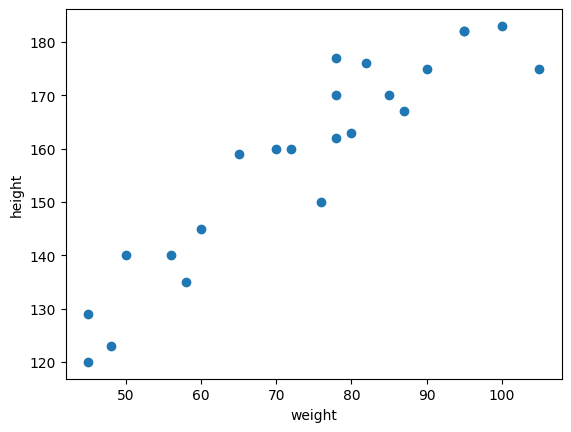

In [42]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel('height')
plt.show()

## Divide dependent and independent features

In [43]:

X = df[['Weight']] # independent feature (2D array)
y = df['Height']  # dependent feature (1D array)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## standardization of dataset

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

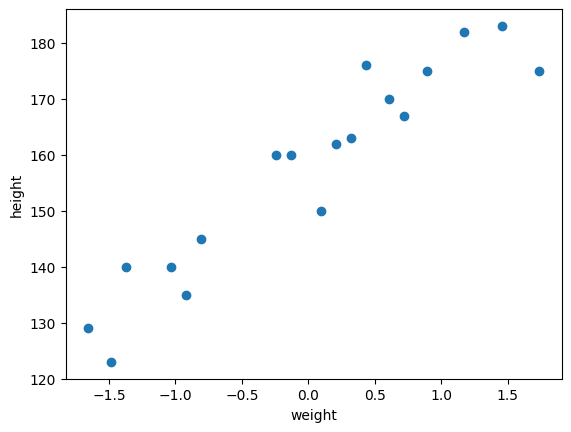

In [47]:
plt.scatter(X_train, y_train)
plt.xlabel("weight")    
plt.ylabel('height')
plt.show()

In [48]:
#  simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


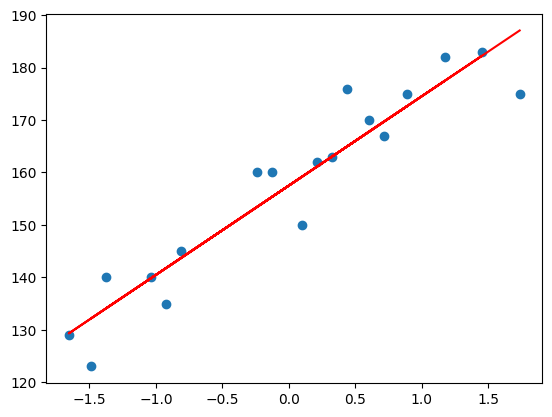

In [49]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train),'r')

In [50]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred , y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

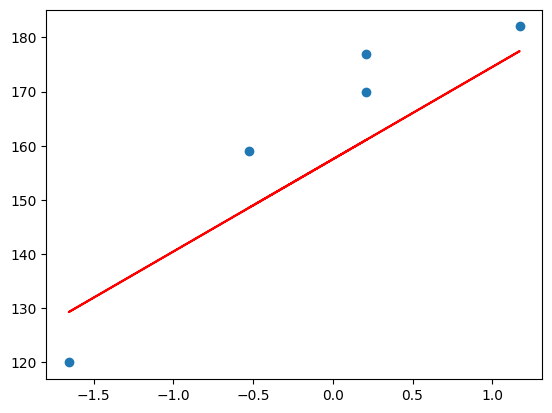

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

In [ ]:
# compute the performance metrics mse , mae 
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse : ",mse)
print("mae : ",mae)
print("rmse : ",rmse) # lees value mean model is good

mse :  109.77592599051664
mae :  9.822657814519232
rmse :  10.477400726827081


In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("r2 score : ",score)

r2 score :  0.776986986042344


In [59]:
# adjusted r2 score
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1-score)*(n-1)/(n-p-1)
print("adjusted r2 score : ",adjusted_r2)

adjusted r2 score :  0.7026493147231252


In [ ]:

#  new data point
scaled_weight = scaler.transform([[80],[90]])

c:\Users\anees\miniconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
scaled_weight

array([[0.32350772],
       [0.88886101]])

In [73]:
print("the height of a person with weight 80 is : ", regressor.predict(scaled_weight)[0])

the height of a person with weight 80 is :  163.01076265919562


In [74]:
print("the height of a person with weight 80 is : ", regressor.predict(scaled_weight)[1])

the height of a person with weight 80 is :  172.64122167526563


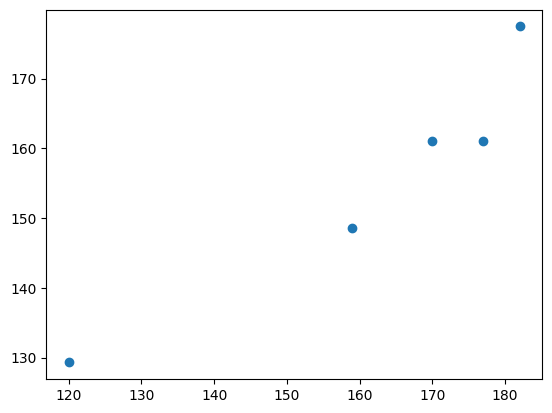

In [ ]:
# assumptions so i train a good model
plt.scatter(y_test, y_pred) #  linear relation it is good

In [76]:
## residual 

residual = y_test - y_pred
residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

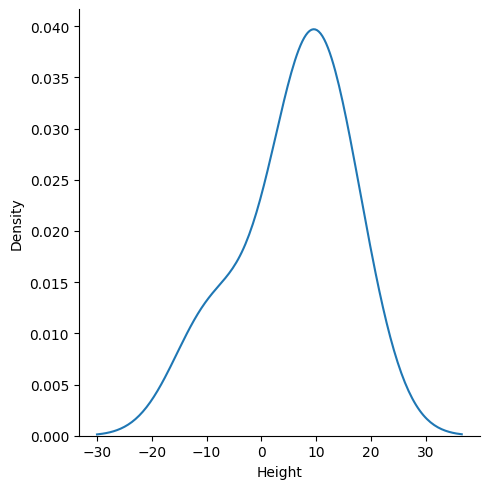

In [79]:
sns.displot(residual, kind='kde') #  normally distributed it is good

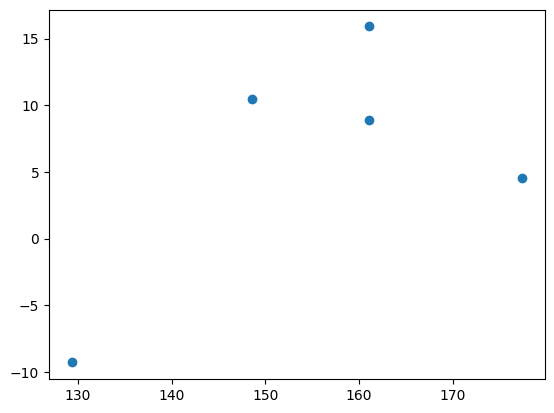

In [81]:
plt.scatter(y_pred, residual) #  if data points uniformly distributed it is good